In [66]:
import numpy.random

from data_utils.serial_utils.time_series import TimeSeries
from data_utils.serial_utils.series_trans_utils import KmeansCluster,MinMax
from easy_datetime.timestamp import TimeStamp
import numpy
import json

from data_utils.stochastic_utils.distributions.basic_distributions import WeibullDistribution

from data_utils.solve_utils.equationNSolve import gradient_descent

from matplotlib import pyplot

In [67]:
with open(r"data\37143002-2024-10-14.json", "r") as f:
    data = json.loads(f.read())

timeline = TimeStamp.timestamp_range("2024-10-14", "2024-10-15", "min", 15, False)
dayahead = numpy.array([i["dayahead_price"] for i in data]).astype(float)
realtime = numpy.array([i["realtime_price"] for i in data]).astype(float)
diff = dayahead - realtime

In [68]:
ts = TimeSeries(x=timeline, y=dayahead, y_hat=realtime)

In [88]:
power,_,__ = MinMax.f(WeibullDistribution(2,5).rvf(len(ts)), 0, 1000)
power_rate = numpy.random.uniform(0,1,len(ts))

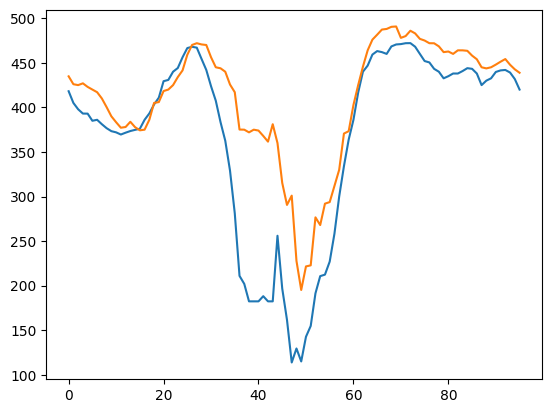

In [89]:
pyplot.plot(dayahead)
pyplot.plot(realtime)

In [90]:
def trade(power, power_rate):
    ahead_amount = power * power_rate * dayahead
    realtime_amount = power * (1- power_rate) * realtime
    amount = ahead_amount + realtime_amount
    return amount

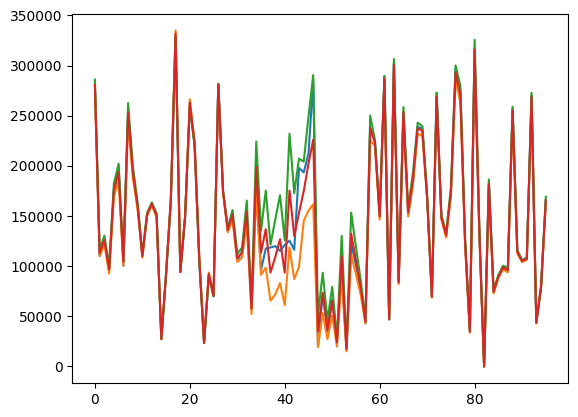

In [91]:
contorl_group_rate = numpy.array([0.5] * len(power))

pyplot.plot(trade(power,power_rate))
pyplot.plot(power * dayahead)
pyplot.plot(power * realtime)
pyplot.plot(trade(power,contorl_group_rate))


In [93]:
base = trade(power,contorl_group_rate)
trade(power,power_rate) - base

array([ 2.50128439e+03, -2.73135774e+03, -1.13959659e+03,  7.29110111e+02,
       -2.18385015e+03,  5.75559123e+03, -3.99117376e+03, -1.69697512e+02,
       -1.00692682e+03,  1.17863760e+03, -3.68069026e+02,  9.12965283e+01,
       -1.13551828e+03,  8.16585361e+02, -5.58015310e+01,  4.98673567e+01,
        1.45377519e+03, -2.97660647e+03, -2.77982438e+01,  8.96180927e+02,
       -2.90935886e+03,  1.98832223e+03, -6.97673398e+02,  1.41660250e+02,
       -5.08565730e+02, -2.27184268e+02, -3.22885841e+01,  6.74365499e+02,
       -9.37233773e+02, -1.92295390e+03, -2.84908340e+03,  1.22317921e+03,
       -6.91307617e+03, -7.49454542e+02, -2.21816529e+04, -1.72091088e+04,
       -1.94027312e+04,  2.51309152e+04,  1.08641250e+04, -1.16717137e+04,
        2.75295766e+04, -4.98781950e+04, -1.35620273e+04,  4.47752994e+04,
        1.87243540e+04,  9.98529223e+03,  5.89558893e+04, -1.48450873e+04,
        1.14174162e+02, -1.69677438e+03,  1.30585946e+03,  3.69634399e+03,
       -1.75925105e+04,  